# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2021s2



In [ ]:
# TODO: RA & Name 
print('213081: ' + 'André Vila Nova Wagner da Costa')
print('233686: ' + 'Eduardo Carvalheira Teixeira de Aguiar')

213081: André Vila Nova Wagner da Costa
233686: Eduardo Carvalheira Teixeira de Aguiar


## Objective: Predict cancer mortality rates for US counties. 

Explore **linear regression** alternatives and come up with the best possible model to the problems, avoiding overfitting. In particular, predict the **TARGET_deathRate** from their attributes.

## Dataset

These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.  

The dataset contains the death rate and attributes of 3,047 counties.

Dataset Information: You should respect the following traininig/test split: 2042 training examples, and 305 test examples.

There are 33 attributes as follows: 

Data Dictionary

- 1: **avgAnnCount**: Mean number of reported cases of cancer diagnosed annually (a)

- 2: **avgDeathsPerYear**: Mean number of reported mortalities due to cancer (a)

- 3: **incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

- 4: **medianIncome**: Median income per county (b)

- 5: **popEst2015**: Population of county (b)

- 6: **povertyPercent**: Percent of populace in poverty (b)

- 7: **studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

- 8: **binnedInc**: Median income per capita binned by decile (b)

- 9: **MedianAge**: Median age of county residents (b)

- 10: **MedianAgeMale**: Median age of male county residents (b)

- 11: **MedianAgeFemale**: Median age of female county residents (b)

- 12: **Geography**: County name (b)

- 13: **AvgHouseholdSize**: Mean household size of county (b)

- 14: **PercentMarried**: Percent of county residents who are married (b)

- 15: **PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

- 16: **PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

- 17: **PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

- 18: **PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

- 19: **PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

- 20: **PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

- 21: **PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

- 22: **PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

- 23: **PctPrivateCoverage**: Percent of county residents with private health coverage (b)

- 24: **PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

- 25: **PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

- 26: **PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

- 27: **PctPubliceCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

- 28: **PctWhite**: Percent of county residents who identify as White (b)

- 29: **PctBlack**: Percent of county residents who identify as Black (b)

- 30: **PctAsian**: Percent of county residents who identify as Asian (b)

- 31: **PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

- 32: **PctMarriedHouseholds**: Percent of married households (b)

- 33: **BirthRate**: Number of live births relative to number of women in county (b)

- **TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities (a)

(a): years 2010-2016

(b): 2013 Census Estimates


The data is available at
- train: https://tinyurl.com/53zvz9t7
- test: https://tinyurl.com/phs3bkbt


## Activities

1. (5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables?




In [ ]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

df=pd.read_csv("data-train.csv")
dt=pd.read_csv("data-test.csv")

#Utilizando o df.isna().sum() achamos as colunas com dados faltantes e preenchemos com os valores medianos

dt["pctsomecol18_24"] = dt["pctsomecol18_24"].fillna(dt["pctsomecol18_24"].median())
dt["pctprivatecoveragealone"] = dt["pctprivatecoveragealone"].fillna(dt["pctprivatecoveragealone"].median())
dt["pctemployed16_over"] = dt["pctemployed16_over"].fillna(dt["pctemployed16_over"].median())
df["pctsomecol18_24"] = df["pctsomecol18_24"].fillna(df["pctsomecol18_24"].median())
df["pctprivatecoveragealone"] = df["pctprivatecoveragealone"].fillna(df["pctprivatecoveragealone"].median())
df["pctemployed16_over"] = df["pctemployed16_over"].fillna(df["pctemployed16_over"].median())

#Removendo as colunas não numericas que não são importantes para o resultado

df = df.drop(["geography", "binnedinc"], axis=1)
dt = dt.drop(["geography", "binnedinc"], axis=1)

#Normalizando os valores da tabela de treino

ndf=df.drop("target_deathrate",axis = 1)  # variaveis independentes
column = ndf.columns
ndf[column] = (ndf[column] - ndf[column].min()) / (ndf[column].max() - ndf[column].min())
y = df["target_deathrate"]    # variavel dependente

x_train, x_valid, y_train, y_valid = train_test_split(ndf, y, test_size = 0.4, random_state=9) #Separação do treino em treino e validação

#Normalizando os valores da tabela de teste

ndt=dt.drop("target_deathrate",axis = 1)
column = ndt.columns
ndt[column] = (ndt[column] - ndt[column].min()) / (ndt[column].max() - ndt[column].min())   
y_test = dt["target_deathrate"]

Resultados dos erros de Validação:
MAE: 21.63851890376238
MSE: 784.7163460278676
RMSE: 28.012788972679385


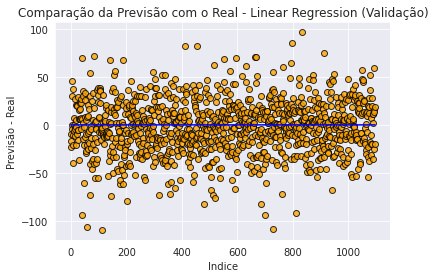

In [ ]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.

interactions = 500
learning_rate = 0.01

#Calculo dos valores de Theta para a função desejada

m = y.shape[0] #total de dados
cost_list=[] #lista de custos durante as epochs
theta = np.zeros((ndf.shape[1],1)).flatten() #Lista com os thetas utilizados
for i in range(interactions):
  pred = np.dot(x_train, theta) #predição
  custo = (1/(2*m))*np.sum(np.square(pred-y_train)) #Calculadora de Custo da função
  gd_theta = (1/m)*np.dot(x_train.T, pred-y_train) #Descida do gradiente
  theta = theta - learning_rate*gd_theta #Recalculando Theta pela descida do gradiente
  cost_list.append(custo) #Adicionar na lista de custo o valor calculado nessa epoch

#Realizar predição para os dados de validação

validation = np.dot(x_valid, theta)
print("Resultados dos erros de Validação:")
print('MAE:', metrics.mean_absolute_error(y_valid,validation))
print('MSE:', metrics.mean_squared_error(y_valid,validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid,validation)))

x_plot = np.arange(0, x_valid.shape[0],1)
y_zeros = np.zeros_like(x_plot)
plt.scatter(x_plot, validation-y_valid, alpha=0.8, color='orange', edgecolors='black')
plt.plot(x_plot, y_zeros, color ='b')
plt.title("Comparação da Previsão com o Real - Linear Regression (Validação)")
plt.ylabel("Previsão - Real")
plt.xlabel("Indice")
plt.grid()
plt.show()

Resultados dos erros do teste:
MAE: 25.595713695484005
MSE: 1005.4352450874308
RMSE: 31.708598913976484


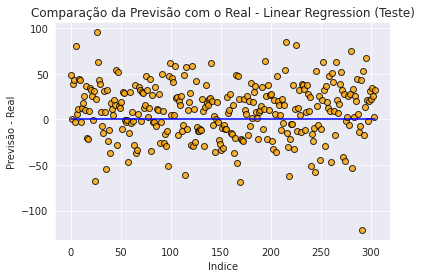

In [ ]:
#Realizar predição para os dados de teste, sendo o resultado final

predictions = np.dot(ndt, theta)
print("Resultados dos erros do teste:")
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

x_plot = np.arange(0, ndt.shape[0],1)
y_zeros = np.zeros_like(x_plot)
plt.plot(x_plot, y_zeros, color ='b')
plt.scatter(x_plot, predictions-y_test, alpha=0.8, color='orange', edgecolors='black')
plt.title("Comparação da Previsão com o Real - Linear Regression (Teste)")
plt.ylabel("Previsão - Real")
plt.xlabel("Indice")
plt.grid()
plt.show()

Resultados dos erros de Validação:
MAE: 14.171965731586974
MSE: 357.0629050388371
RMSE: 18.89610819822


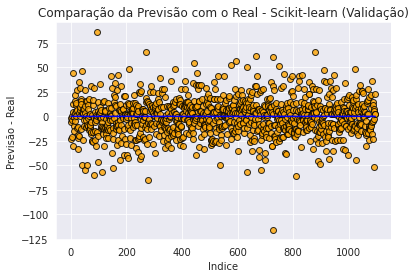

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()   # regressao linear

lr.fit(x_train,y_train)   # fitting

y_validation = lr.predict(x_valid)
print("Resultados dos erros de Validação:")
print('MAE:', metrics.mean_absolute_error(y_valid,y_validation))
print('MSE:', metrics.mean_squared_error(y_valid,y_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid,y_validation)))

x_plot = np.arange(0, x_valid.shape[0],1)
y_zeros = np.zeros_like(x_plot)
plt.plot(x_plot, y_zeros, color ='b')
plt.scatter(x_plot, y_validation-y_valid, alpha=0.8, color='orange', edgecolors='black')
plt.title("Comparação da Previsão com o Real - Scikit-learn (Validação)")
plt.ylabel("Previsão - Real")
plt.xlabel("Indice")
plt.grid()
plt.show()

Resultados dos erros do teste:
MAE: 29.734578759272335
MSE: 1396.1331256249846
RMSE: 37.36486485490058


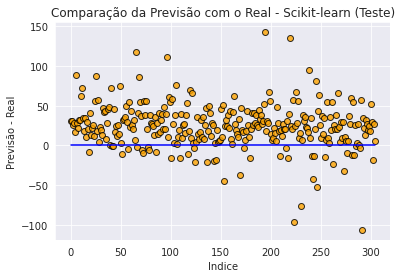

In [ ]:
y_prediction = lr.predict(ndt)
print("Resultados dos erros do teste:")
print('MAE:', metrics.mean_absolute_error(y_test,y_prediction))
print('MSE:', metrics.mean_squared_error(y_test,y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

x_plot = np.arange(0, ndt.shape[0],1)
y_zeros = np.zeros_like(x_plot)
plt.plot(x_plot, y_zeros, color ='b')
plt.scatter(x_plot, y_prediction-y_test, alpha=0.8, color='orange', edgecolors='black')
plt.title("Comparação da Previsão com o Real - Scikit-learn (Teste)")
plt.ylabel("Previsão - Real")
plt.xlabel("Indice")
plt.grid()
plt.show()


> What are the conclusions? (1-2 paragraphs)

Enquanto avaliávamos os dados disponíveis, notamos que as colunas 17, 21 e 24 apresentavam valores nulos. Logo, decidimos preencher os dados faltantes com os valores medianos daqueles disponíveis em cada coluna. Também decidimos remover as colunas 8 e 12, que são não numéricas e não seriam importantes para nossa avaliação.

Depois, fizemos a regressão linear dos dados sem uso de bibliotecas externas e, logo após, utilizando ferramentas disponíveis na biblioteca scikit-learn, calculando posteriormente os seus respectivos erros. Com isso, notamos que, apesar de bibliotecas externas facilitarem o desenvolvimento do código, não somente é possível desenvolver um código capaz de produzir uma regressão linear, como este pode produzir resultados mais fiéis ao esperado que um programa que utiliza a biblioteca citada, assim, deve-se tomar cuidado ao utilizar as bibliotecas, com o possível overfitting causado neste caso, visto que os dados de validação tem uma precisão muito maior que a do teste.




2. (2 points) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [ ]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import scale

x_sgdr = scale(x_train)
x_validsgdr = scale(x_valid)
y_sgdr = scale(y_train)
y_validsgdr = scale(y_valid)

sgdr = SGDRegressor(alpha=0.0001)
sgdr.fit(x_sgdr, y_sgdr)

score = sgdr.score(x_sgdr, y_sgdr)
print(score)

0.5030702477574465


In [ ]:
sgdr = SGDRegressor(alpha=0.01)
sgdr.fit(x_sgdr, y_sgdr)

score = sgdr.score(x_sgdr, y_sgdr)
print(score)

0.504863131073124


In [ ]:
sgdr = SGDRegressor(alpha=1)
sgdr.fit(x_sgdr, y_sgdr)

score = sgdr.score(x_sgdr, y_sgdr)
print(score)

0.4484356926328793


Nota-se como o *learning rate* influencia o resultado e o tempo de execução do código. Quanto maior o valor de *alpha*, que influencia o cálculo da taxa de aprendizado, menor o tempo de execução do código. No entanto, valores muito altos podem fazer com que o programa não encontre o mínimo do gradiente, levando a resultados não muito acertivos, conforme podemos ver nesse exercício, em que o menor valor de *alpha* levou ao maior *score*. A taxa de aprendizado, por padrão, é calculada pela função SGDRegressor() através da fórmula ` eta = 1.0 / (alpha * (t + t0)) `.


3. (2 points) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


Resultados dos erros de Validação:
MAE: 51.37688011762254
MSE: 15556.399269778163
RMSE: 124.7252952282662


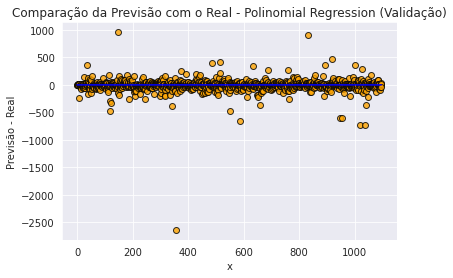

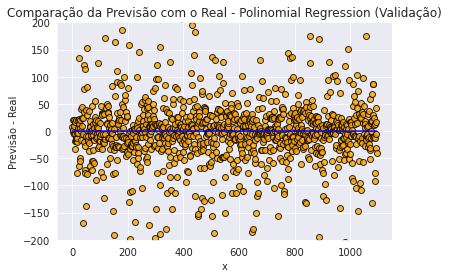

In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.

from sklearn.preprocessing import PolynomialFeatures

#Escolhendo o grau da regressão polinomial

poly = PolynomialFeatures(degree=4)

#Passando os dados para o padrão polinomial

x_poly, xv_poly, xt_poly = poly.fit_transform(x_train), poly.fit_transform(x_valid), poly.fit_transform(ndt)

#Realizando o treinamento

model = LinearRegression()
model.fit(x_poly, y_train)

y_validation = model.predict(xv_poly)
print("Resultados dos erros de Validação:")
print('MAE:', metrics.mean_absolute_error(y_valid,y_validation))
print('MSE:', metrics.mean_squared_error(y_valid,y_validation))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid,y_validation)))

x_plot = np.arange(0, x_valid.shape[0],1)
y_zeros = np.zeros_like(x_plot)
plt.plot(x_plot, y_zeros, color ='b')
plt.scatter(x_plot, y_validation-y_valid, alpha=0.8, color='orange', edgecolors='black')
plt.title("Comparação da Previsão com o Real - Polinomial Regression (Validação)")
plt.ylabel("Previsão - Real")
plt.xlabel("x")
plt.grid()
plt.show()

x_plot = np.arange(0, x_valid.shape[0],1)
y_zeros = np.zeros_like(x_plot)
plt.plot(x_plot, y_zeros, color ='b')
plt.scatter(x_plot, y_validation-y_valid, alpha=0.8, color='orange', edgecolors='black')
plt.title("Comparação da Previsão com o Real - Polinomial Regression (Validação)")
plt.ylabel("Previsão - Real")
plt.xlabel("x")
plt.ylim(bottom=-200, top=200)
plt.grid()
plt.show()

Resultados dos erros do teste:
MAE: 448.7856692842201
MSE: 485381.41266030405
RMSE: 696.6931983737921




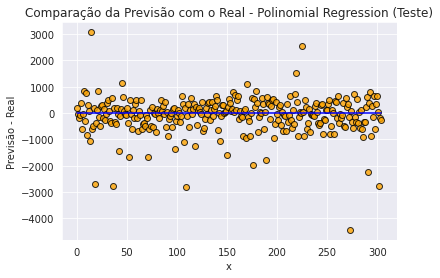

In [ ]:
y_prediction = model.predict(xt_poly)
print("Resultados dos erros do teste:")
print('MAE:', metrics.mean_absolute_error(y_test,y_prediction))
print('MSE:', metrics.mean_squared_error(y_test,y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
print("\n")

x_plot = np.arange(0, ndt.shape[0],1)
y_zeros = np.zeros_like(x_plot)
plt.plot(x_plot, y_zeros, color ='b')
plt.scatter(x_plot, y_prediction-y_test, alpha=0.8, color='orange', edgecolors='black')
plt.title("Comparação da Previsão com o Real - Polinomial Regression (Teste)")
plt.ylabel("Previsão - Real")
plt.xlabel("x")
plt.grid()
plt.show()


 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

Nota-se, através dos resultados apresentados, que o método de regressão linear chegou a predições mais fiéis ao que era esperado do que o método polinomial, tanto para as funções que utilizam bibliotecas scikit-learn quanto para as que não utilizam. 

Isso se deve, provavelmente, à presença de um grande número de variáveis independentes nos datasets, o que faz com que a regressão polinomial precise ponderar muitos valores, sendo que alguns deles terão um peso muito maior que os outros, justamente por se tratar de um polinômio.

4. (1 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

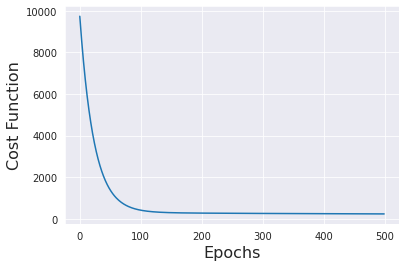

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

tam = np.arange(0, interactions)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Cost Function", fontsize=16)
plt.grid()
plt.plot(tam, cost_list)
plt.show()

> What are the conclusions? (2-4 paragraphs)

O gráfico acima é gerado a partir dos custos calculados no código da questão 1, assim, seria o valor da Função de Custo para a solução feita na mão, sem o uso de bibliotecas. Como podemos analisar, o modelo realmente funciona, visto que o valor da função de custo tende a convergir em um valor, estabilizando aproximadamente em J = 240. 

Portanto, há uma queda rápida nas primeiras épocas, em que o valor da função decai de 10000 para menos que 300 em 100 épocas. Além disso, é interessante o fato que a convergência aparenta ocorrer em um valor de custo de aproximadamente 240, isto ocorre pois o modelo não é linear, logo, sempre haverá pontos deslocados da previsão se comparado com o resultado real, assim, o modelo feito não apresenta um overfitting por não convergir a 0.

## Deadline

Monday, October 11th 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- October 12th 11:59 pm : grade * 0.75
- October 13th 11:59 pm : grade * 0.5
- October 14th 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**